In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RepeatedKFold, cross_validate, cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from scipy.stats import normaltest
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
# Global Variables
seed = random.seed(123)
number_clusters = 3

# Analisis Exploratorio

In [56]:
# Variable classification
train_data = pd.read_csv('./data/train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('./data/test.csv', encoding = "ISO-8859-1")
variables = pd.read_csv('./data/variables.txt', encoding = "ISO-8859-1")
quant_vars = list(variables.loc[(variables['Clasification'] == 'Cuantitativa')]['Variable'].values)
quali_vars = list(variables.loc[(variables['Clasification'] == 'Cualitativa')]['Variable'].values)[1:]

### Analizando las variables numericas

In [4]:
train_data[quant_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


LotFrontage: Kurtosis: 17.375300497599614 Skewness: 2.160865994705543 

LotArea: Kurtosis: 202.5437927513529 Skewness: 12.195142125084478 

MasVnrArea: Kurtosis: 10.04360232122905 Skewness: 2.6663261001607435 

BsmtFinSF1: Kurtosis: 11.076089857631942 Skewness: 1.6837708962341815 

BsmtFinSF2: Kurtosis: 20.04041549471293 Skewness: 4.250888017057445 

BsmtUnfSF: Kurtosis: 0.4692620789683075 Skewness: 0.9193227015582005 

TotalBsmtSF: Kurtosis: 13.201041630635025 Skewness: 1.522688086978629 

1stFlrSF: Kurtosis: 5.722076026587489 Skewness: 1.3753417421837937 

2ndFlrSF: Kurtosis: -0.5556767272864769 Skewness: 0.8121942731961613 

LowQualFinSF: Kurtosis: 82.945932358931 Skewness: 9.002080417658552 

GrLivArea: Kurtosis: 4.874265760253215 Skewness: 1.365155954773434 

BsmtFullBath: Kurtosis: -0.8403341716305701 Skewness: 0.5954540376067279 

BsmtHalfBath: Kurtosis: 16.33643610470807 Skewness: 4.0991856695420035 

FullBath: Kurtosis: -0.8582173323828637 Skewness: 0.0365239844325461 

HalfBa

C:\Users\oestr\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


GarageArea: Kurtosis: 0.9098227950882034 Skewness: 0.1797959420587727 

WoodDeckSF: Kurtosis: 2.978604140391349 Skewness: 1.5397916998042025 

OpenPorchSF: Kurtosis: 8.457180405184337 Skewness: 2.361911928568972 

EnclosedPorch: Kurtosis: 10.39097160371135 Skewness: 3.086696471376678 

3SsnPorch: Kurtosis: 123.23517727268867 Skewness: 10.293752357165413 

ScreenPorch: Kurtosis: 18.371874098863685 Skewness: 4.1179773827954875 

PoolArea: Kurtosis: 222.500506832132 Skewness: 14.813134660429398 

MiscVal: Kurtosis: 698.6008400387273 Skewness: 24.4516396173223 

SalePrice: Kurtosis: 6.509812011089439 Skewness: 1.880940746034036 



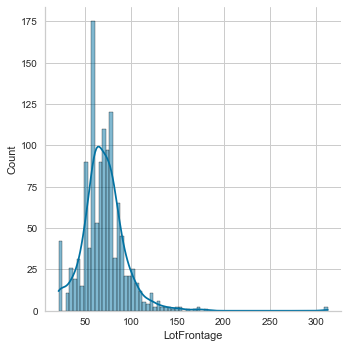

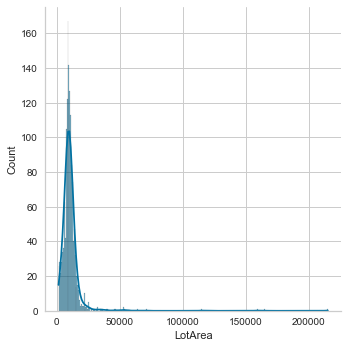

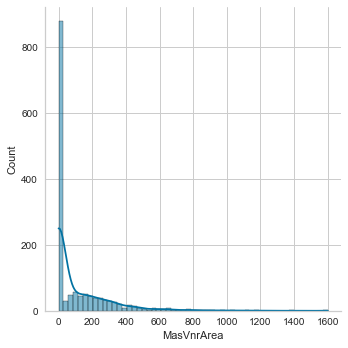

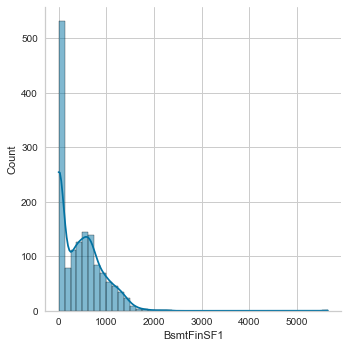

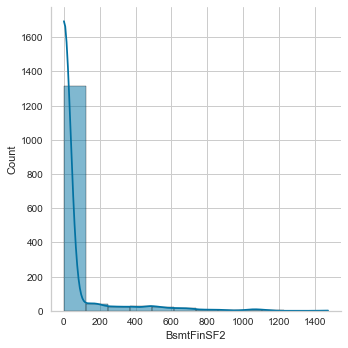

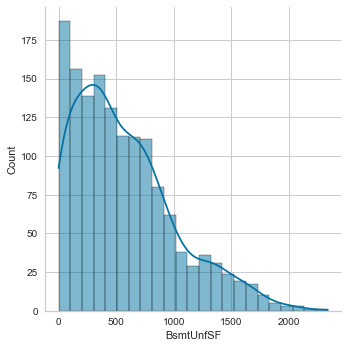

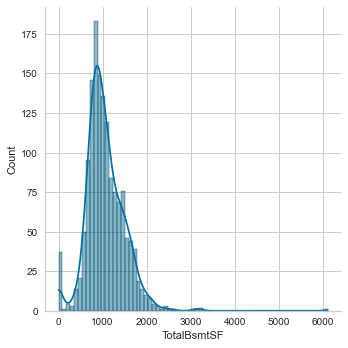

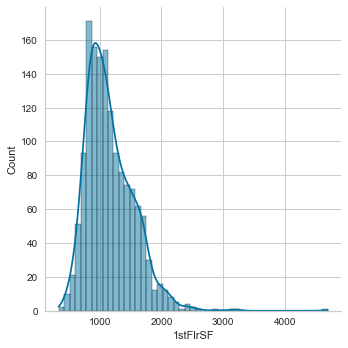

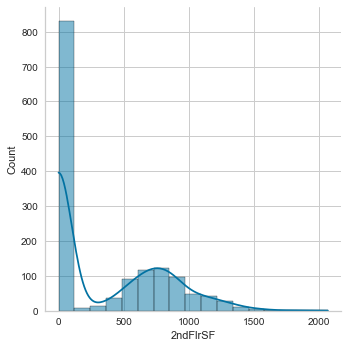

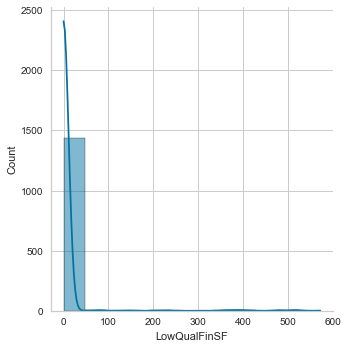

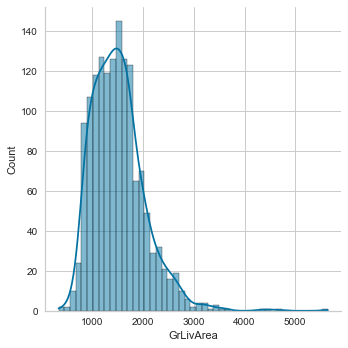

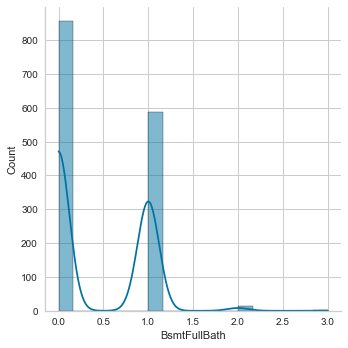

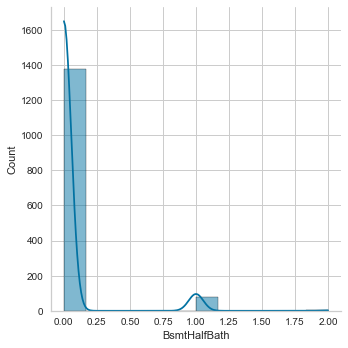

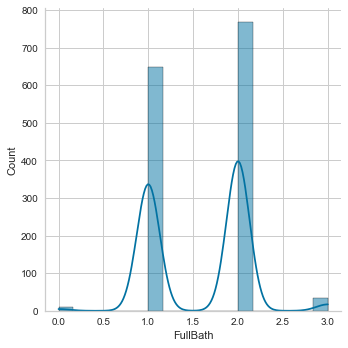

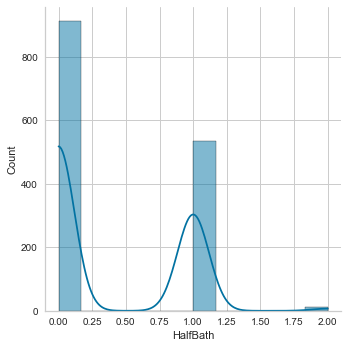

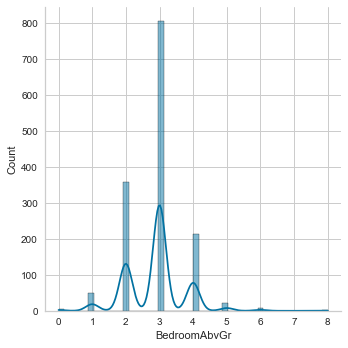

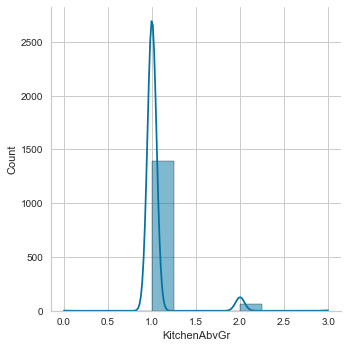

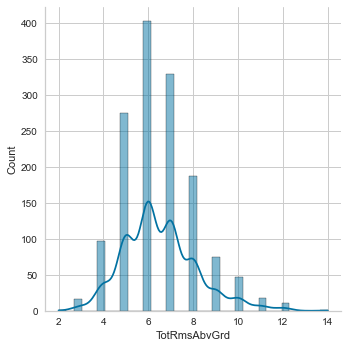

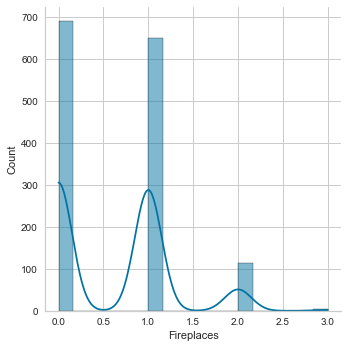

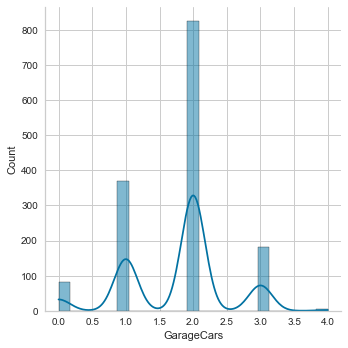

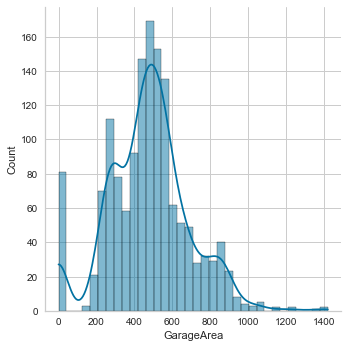

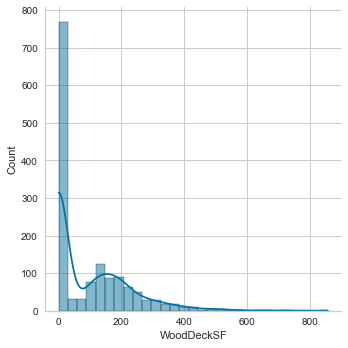

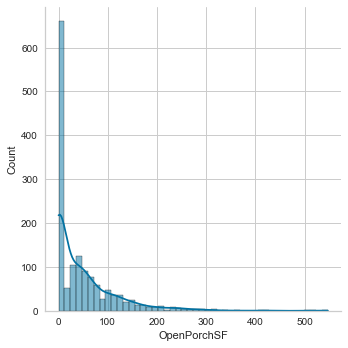

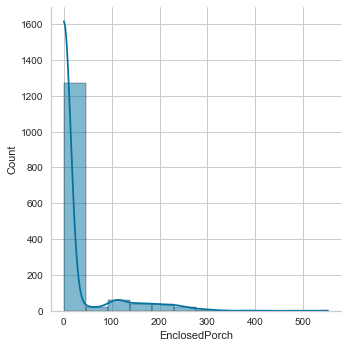

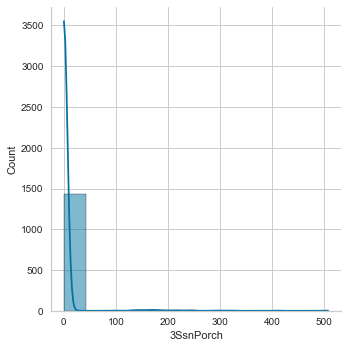

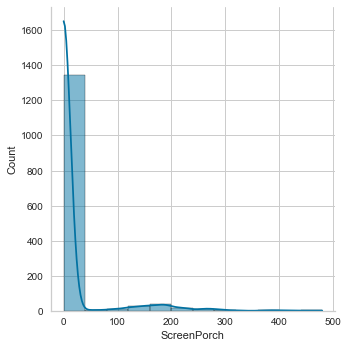

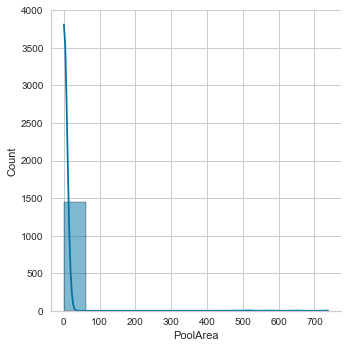

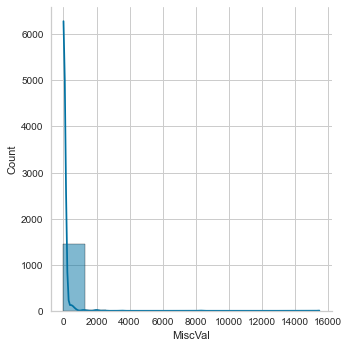

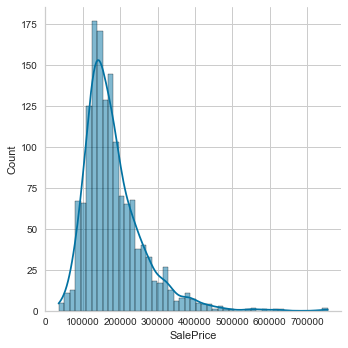

In [5]:
for var in quant_vars:
    data = train_data[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

### Analizando las variables categoricas

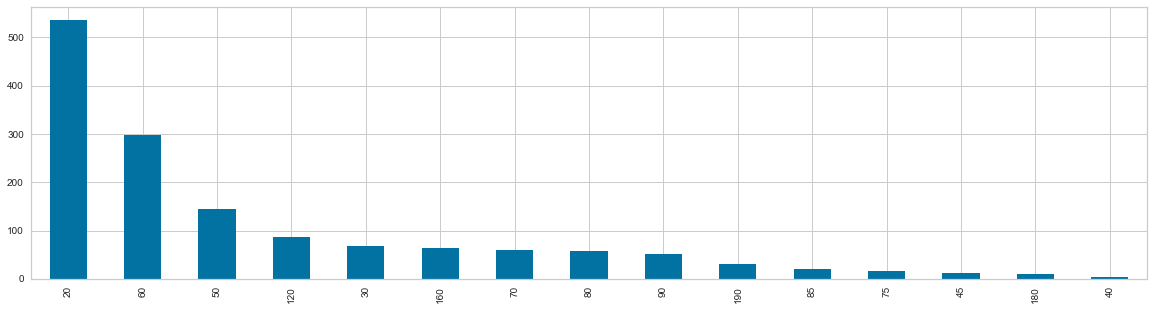

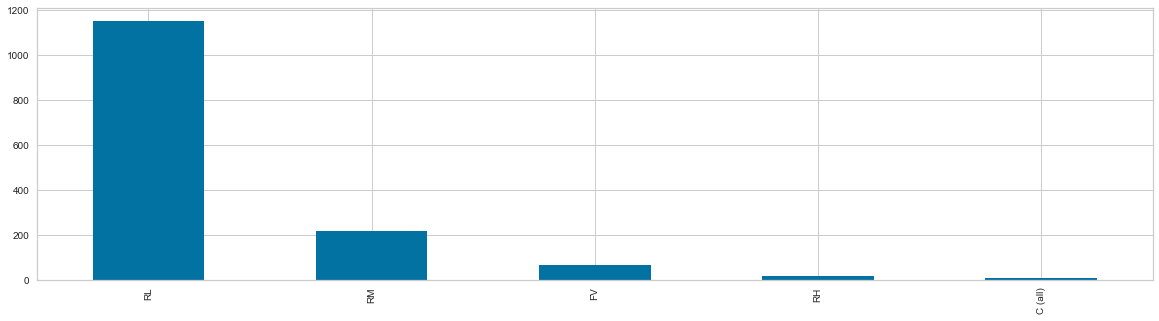

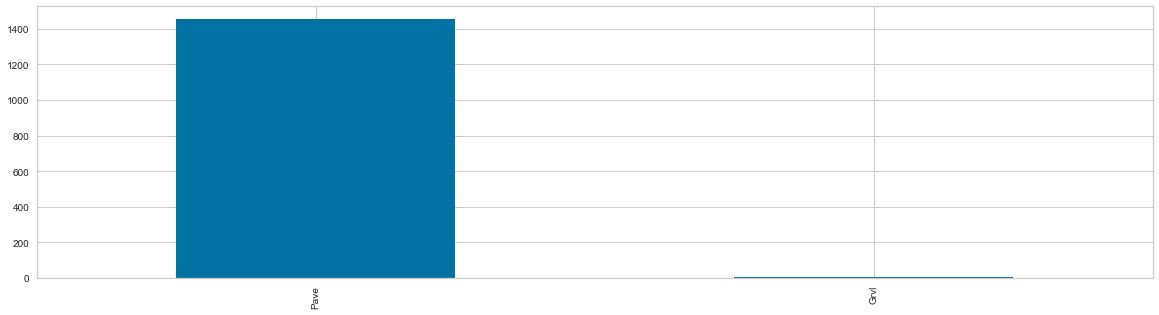

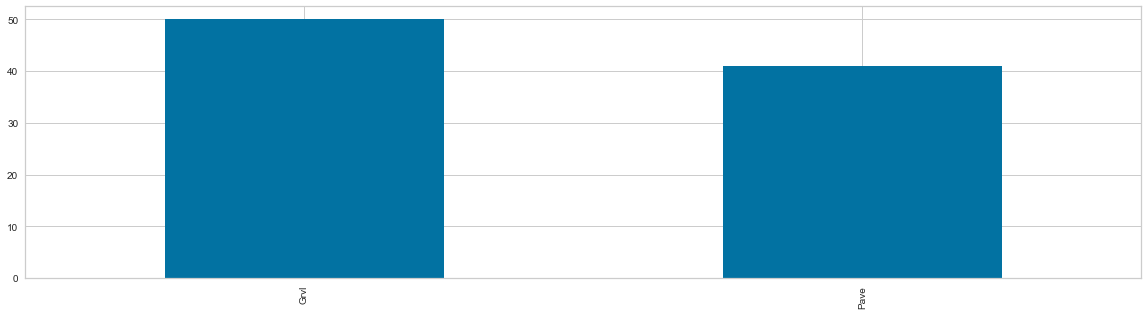

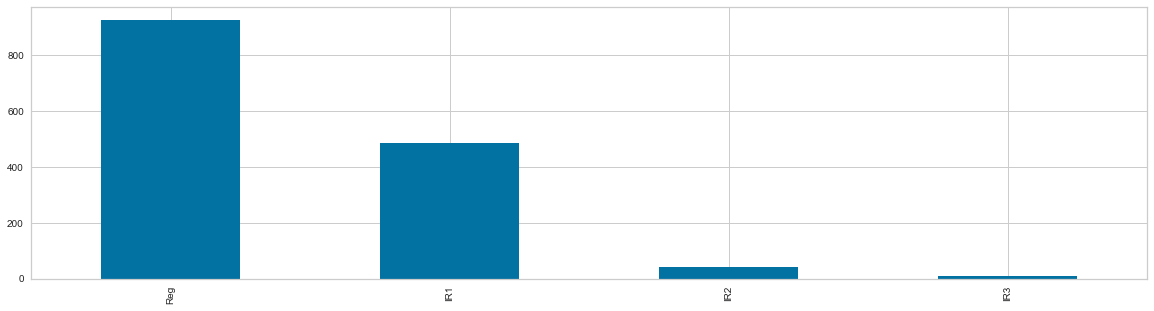

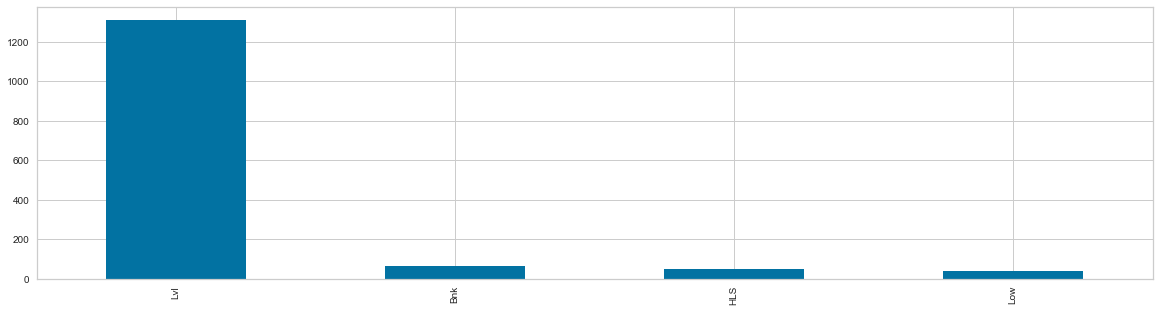

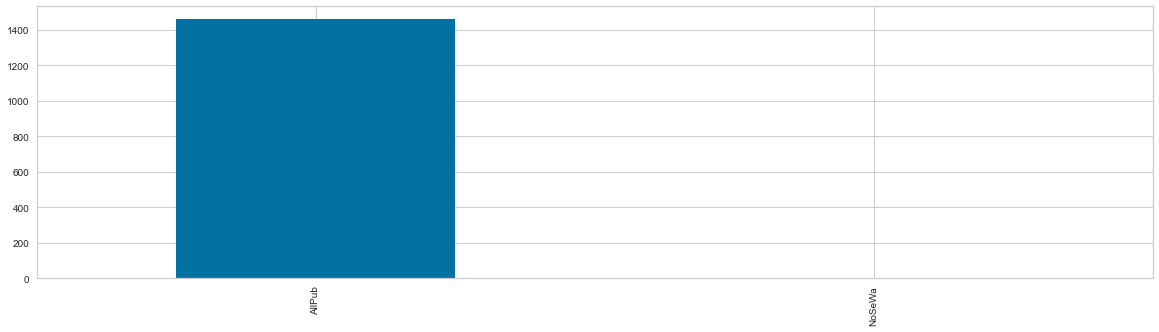

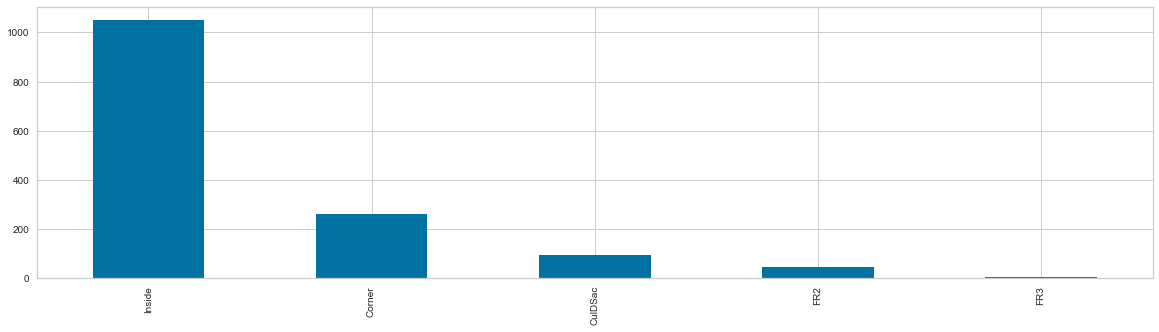

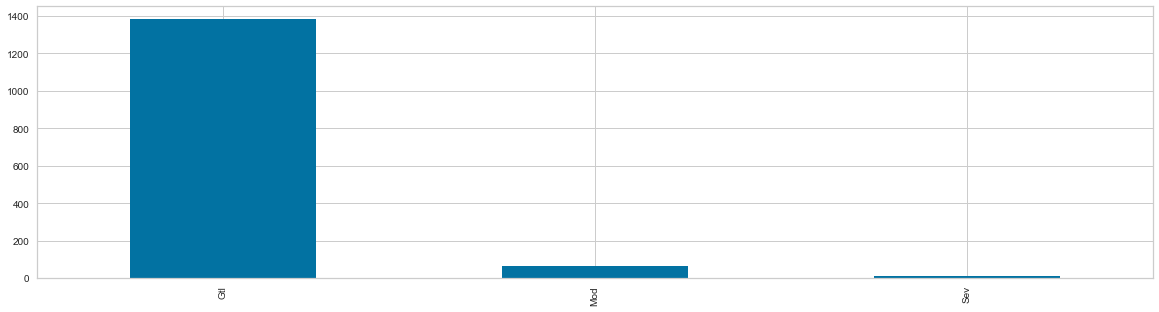

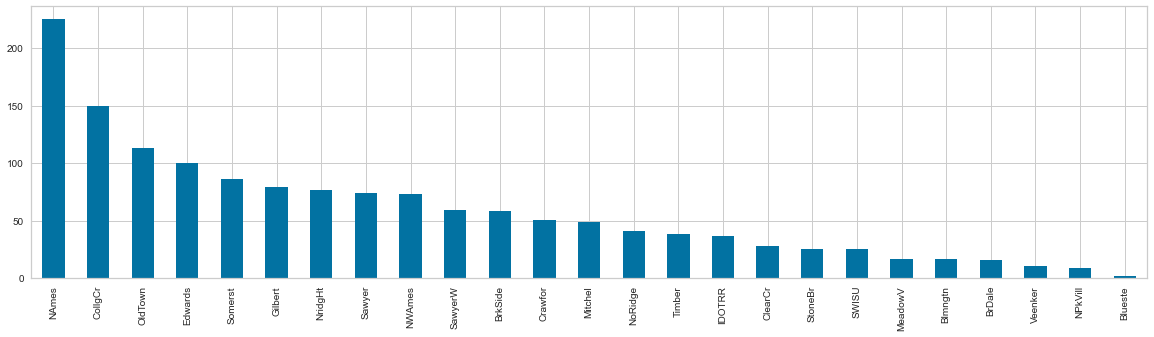

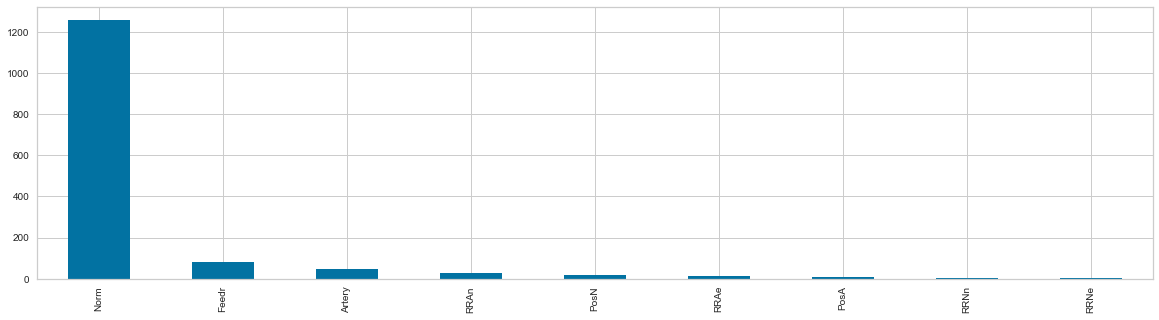

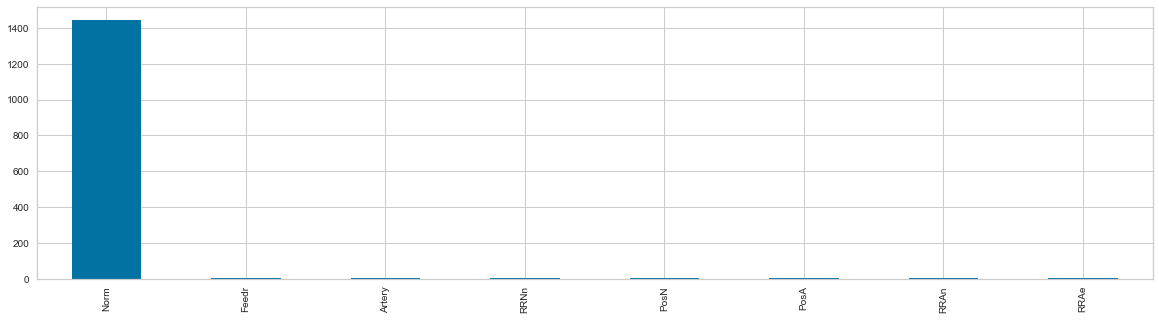

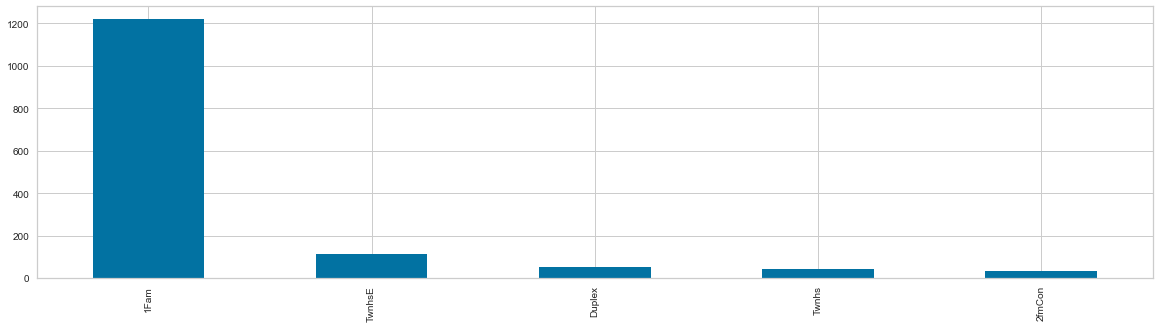

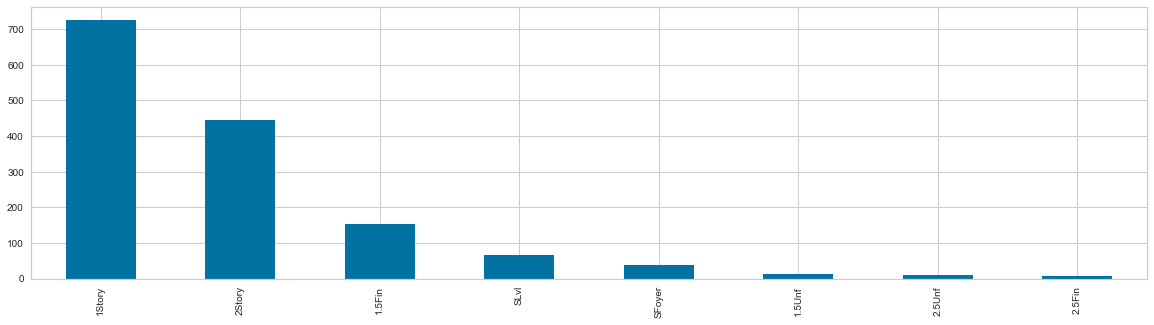

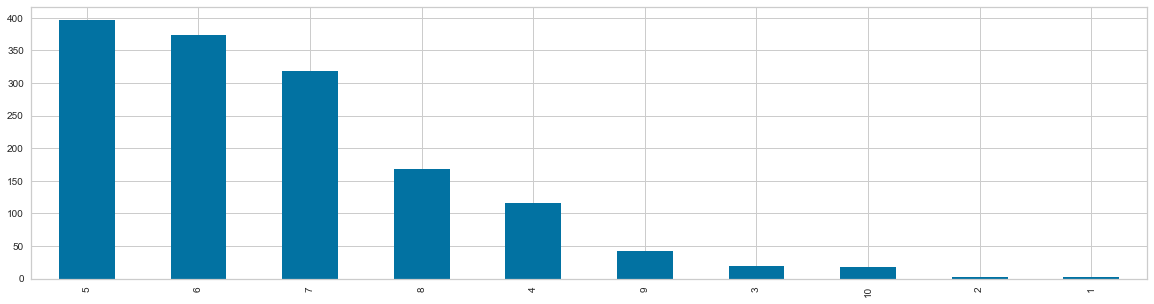

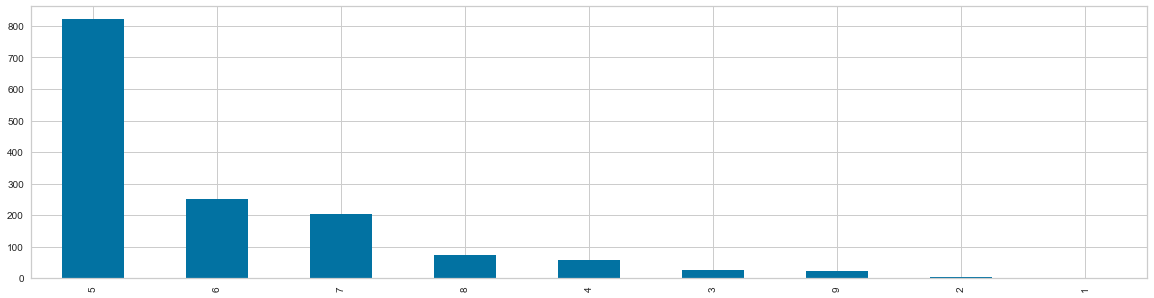

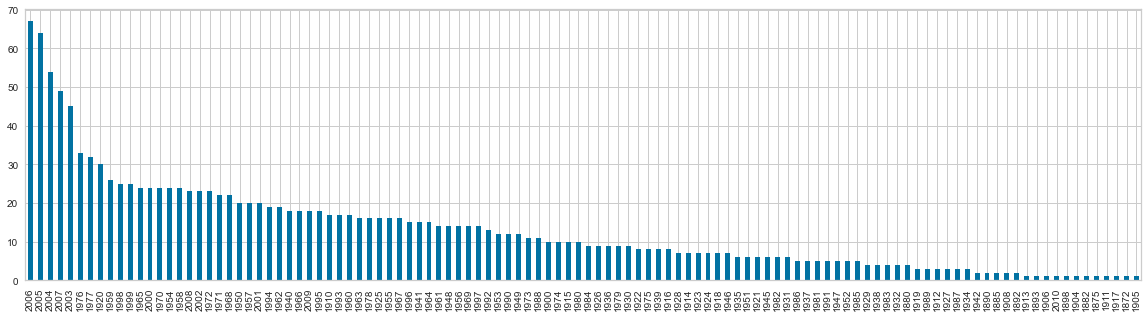

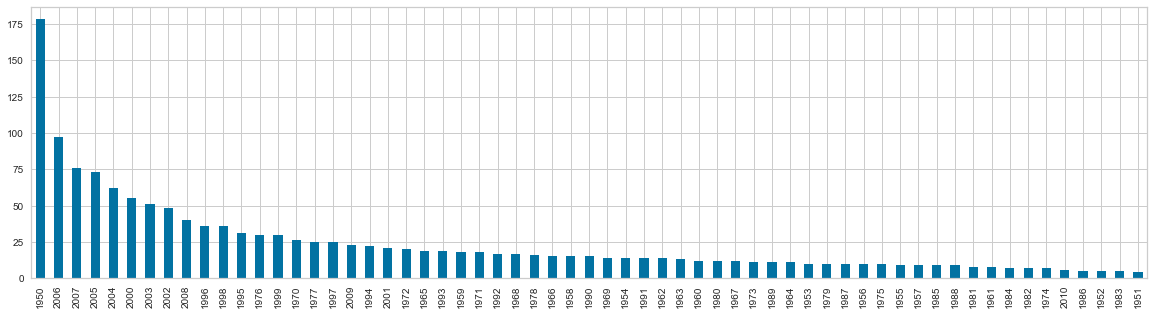

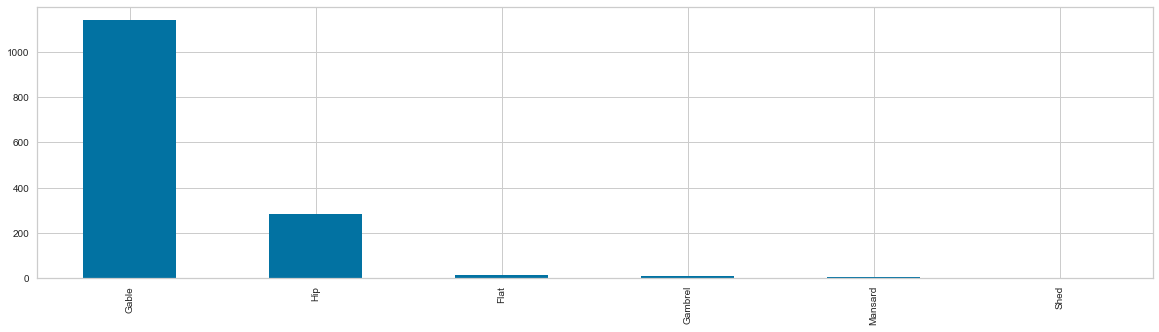

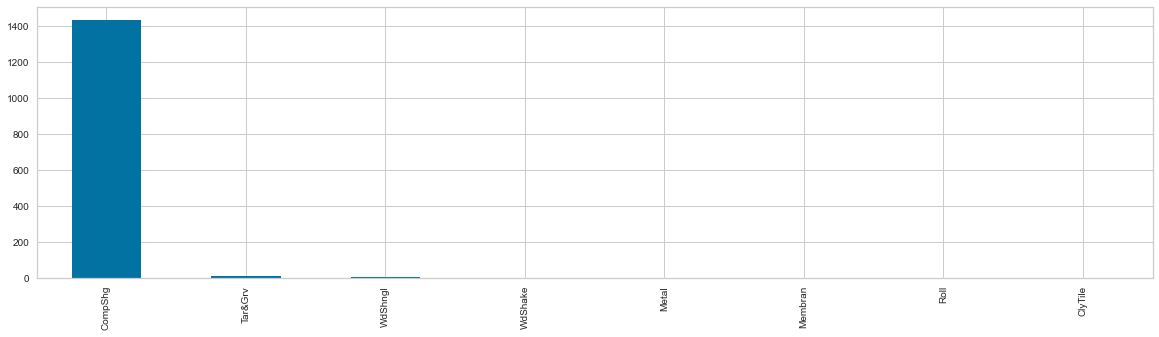

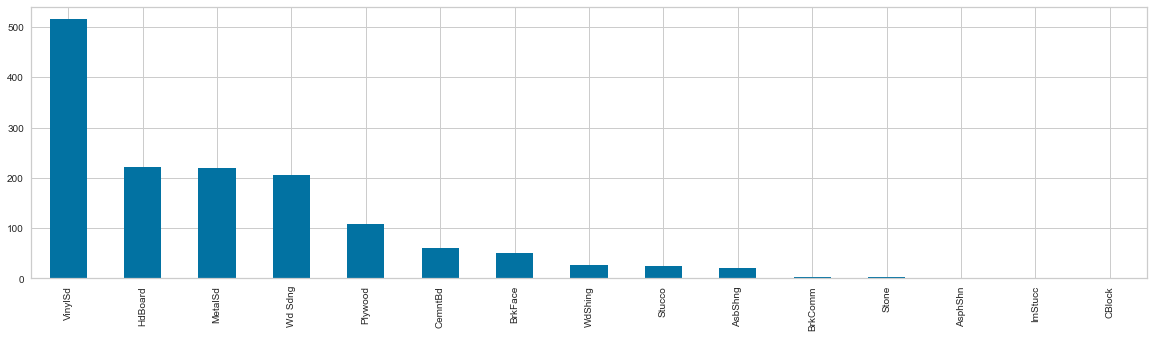

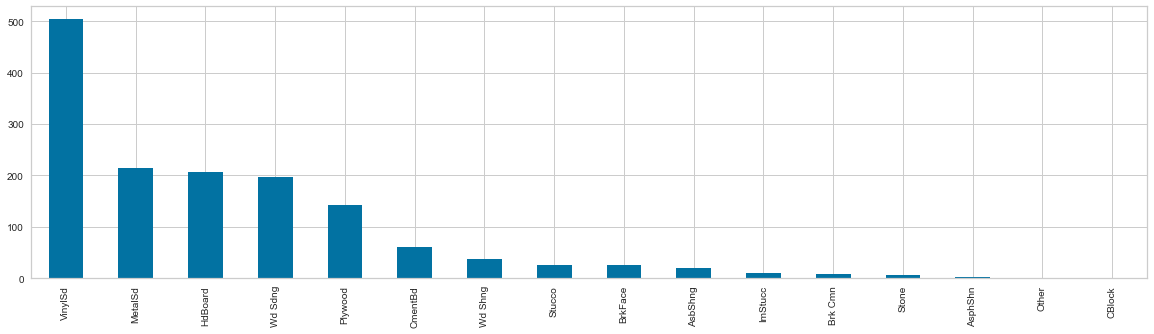

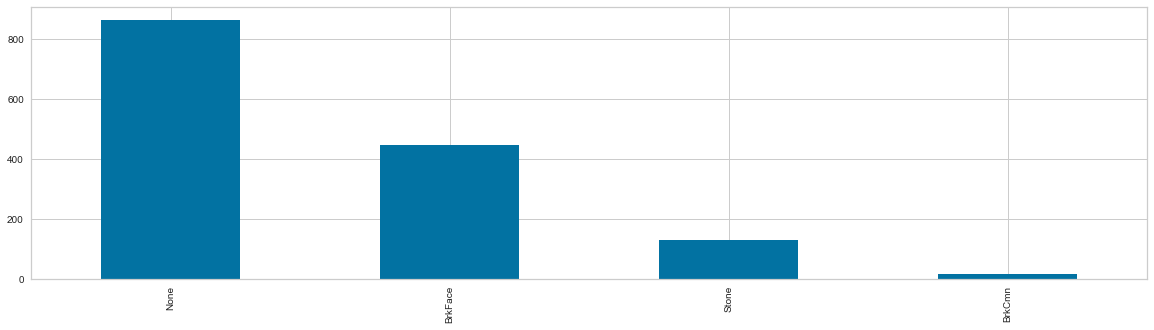

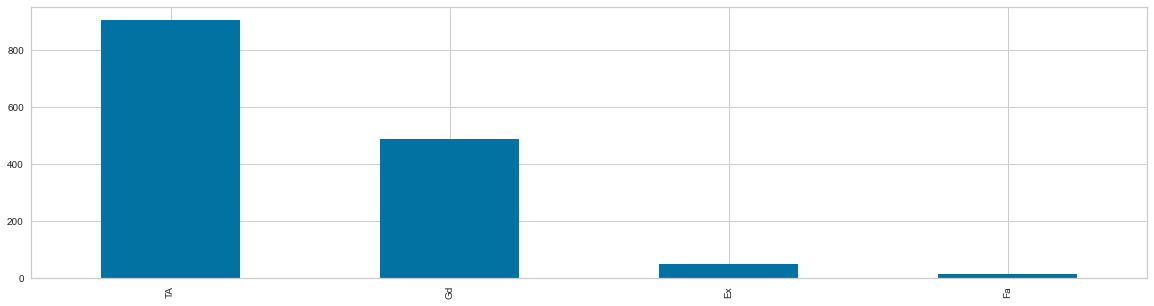

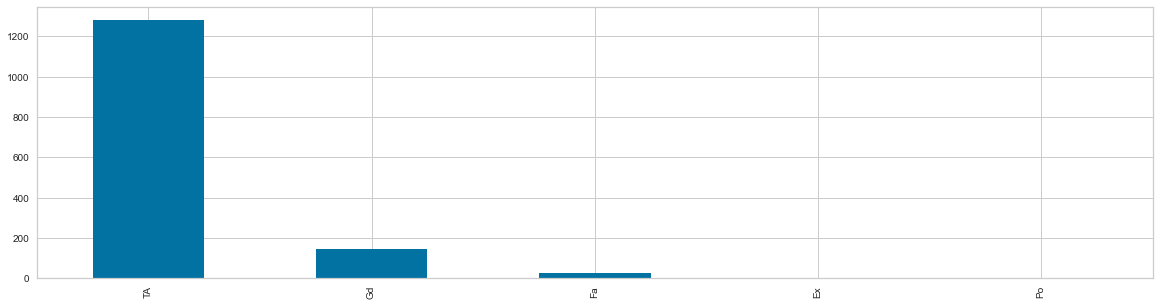

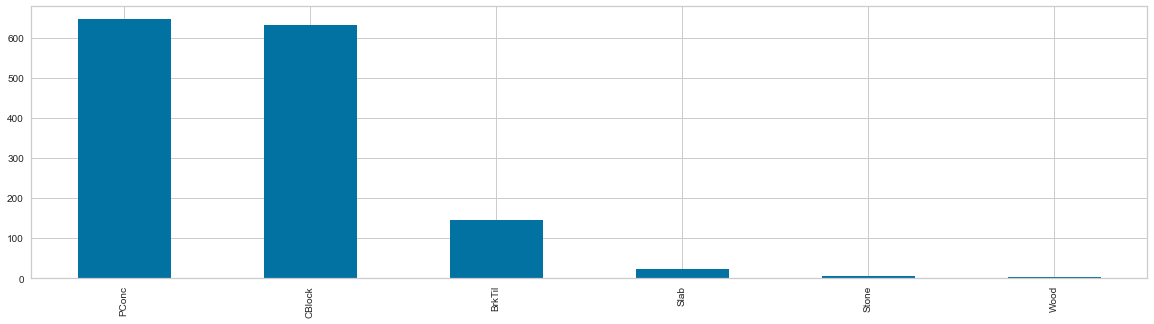

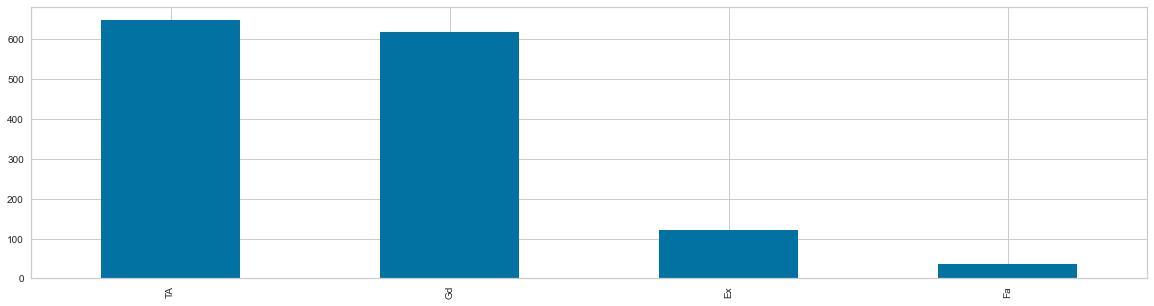

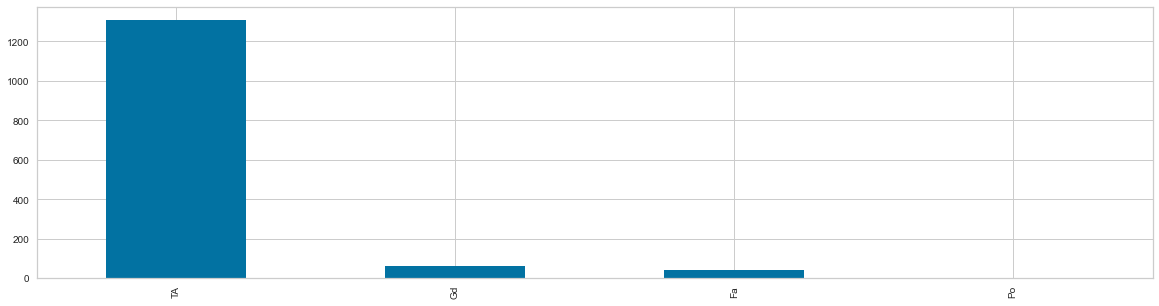

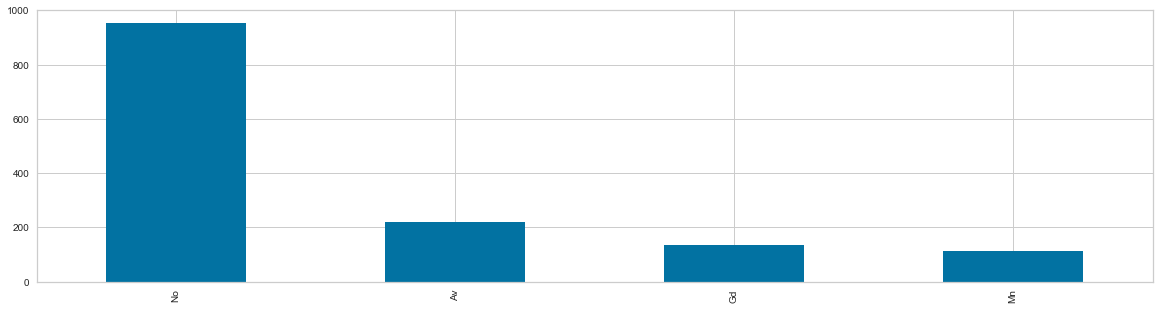

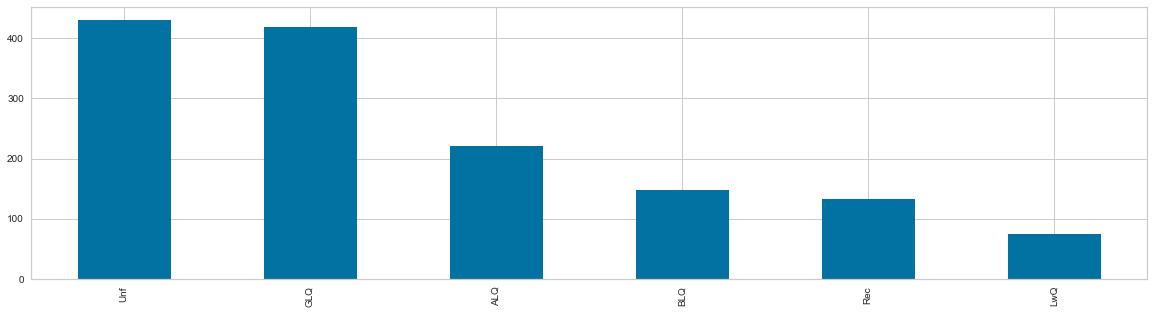

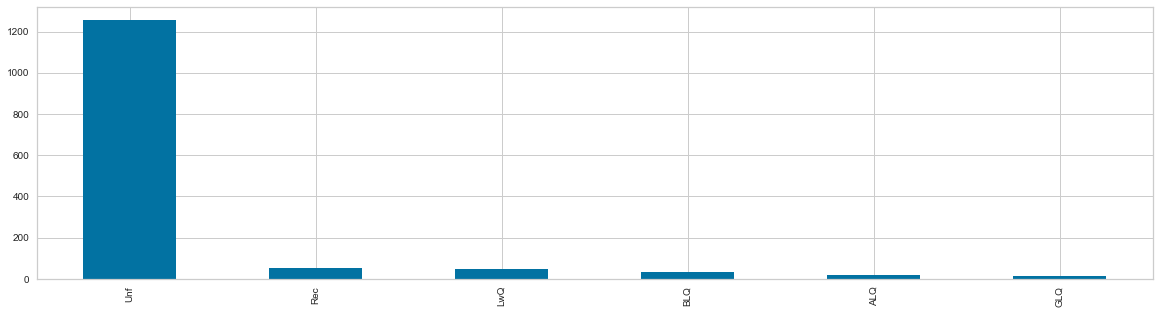

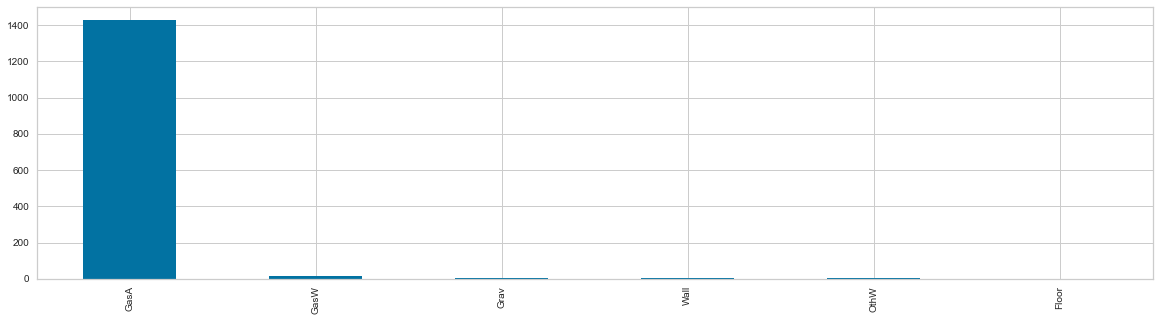

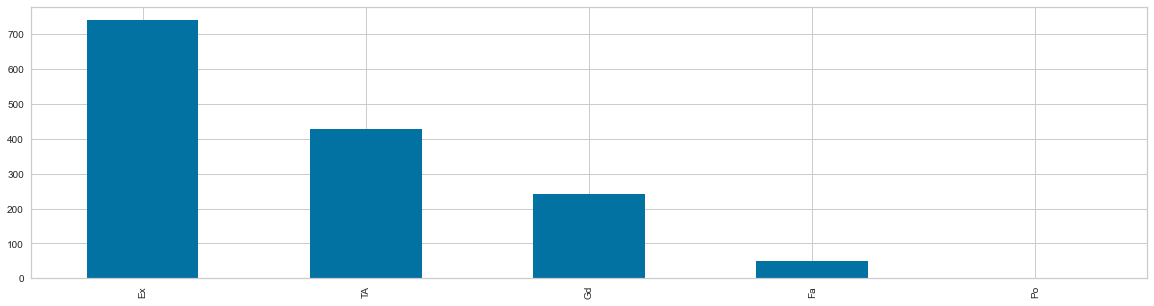

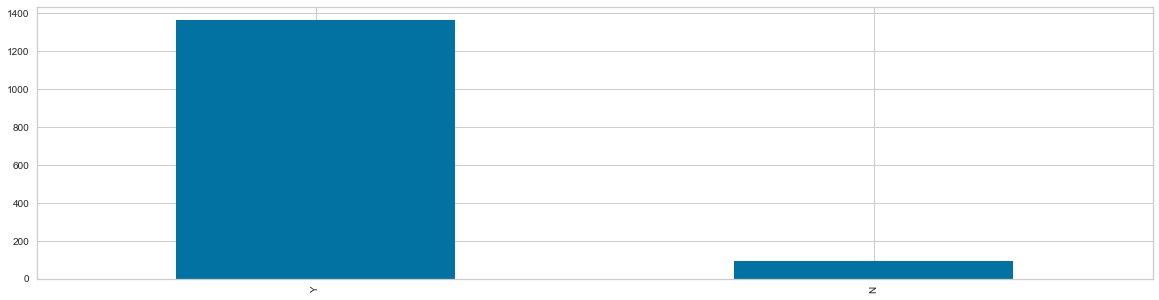

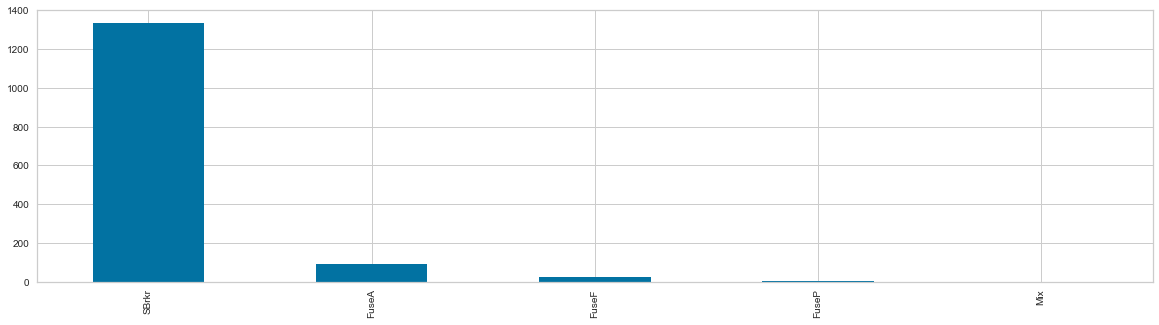

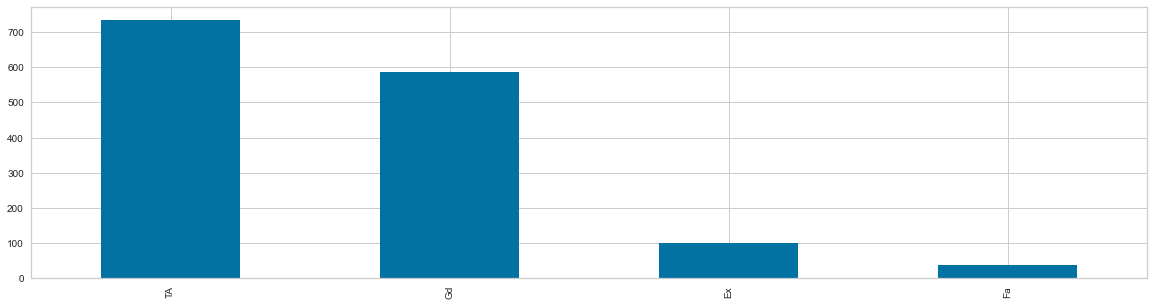

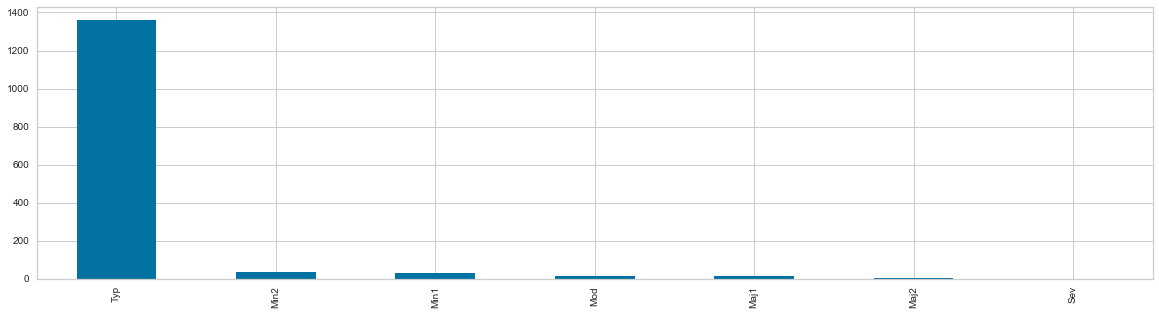

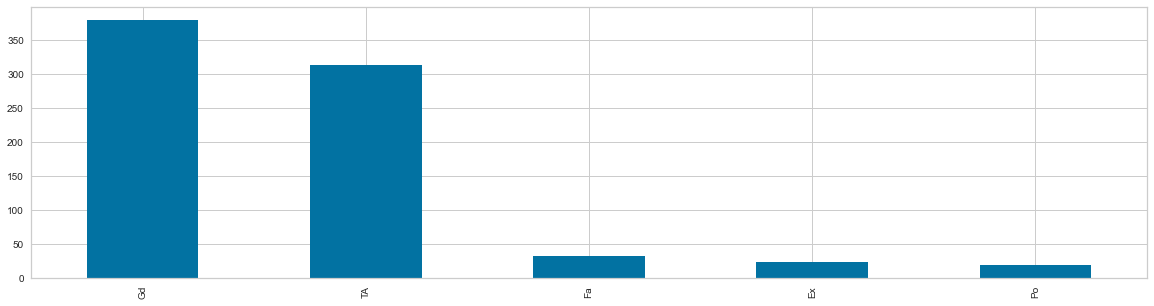

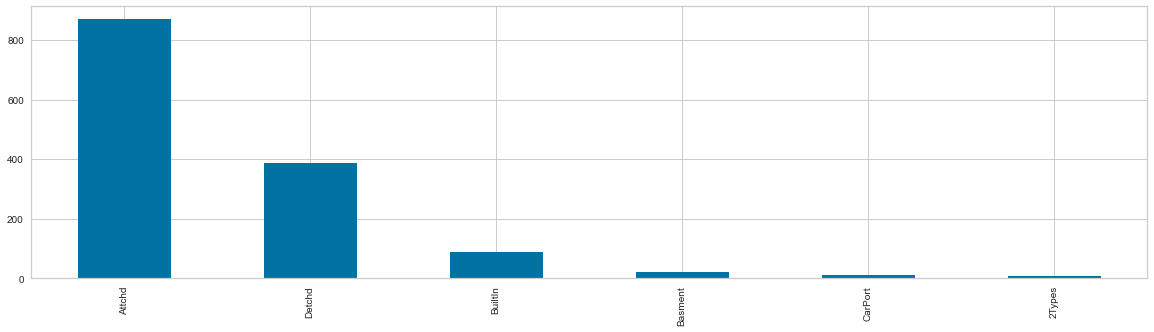

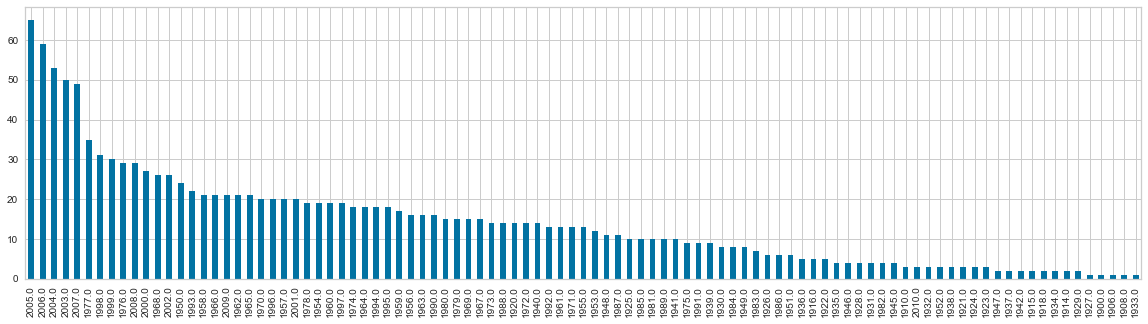

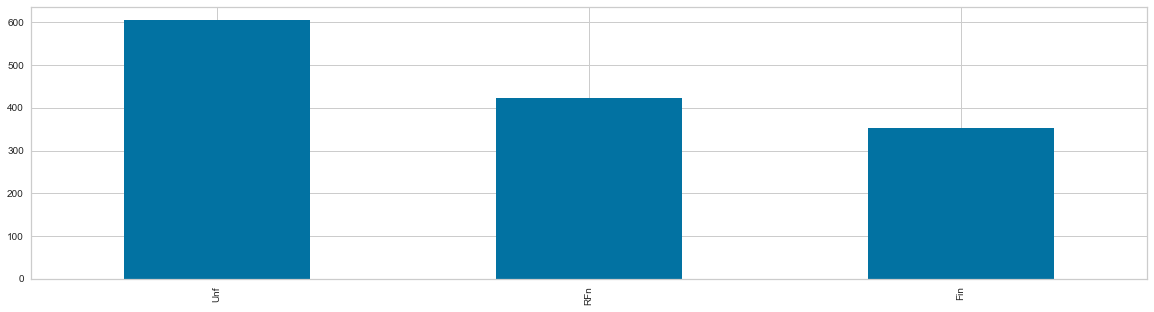

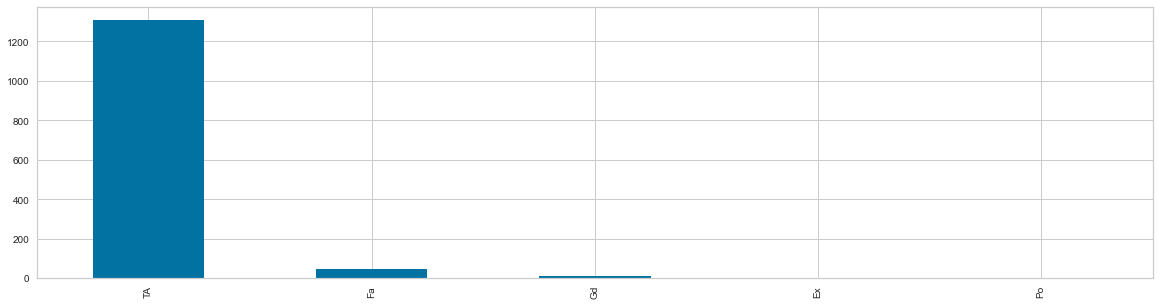

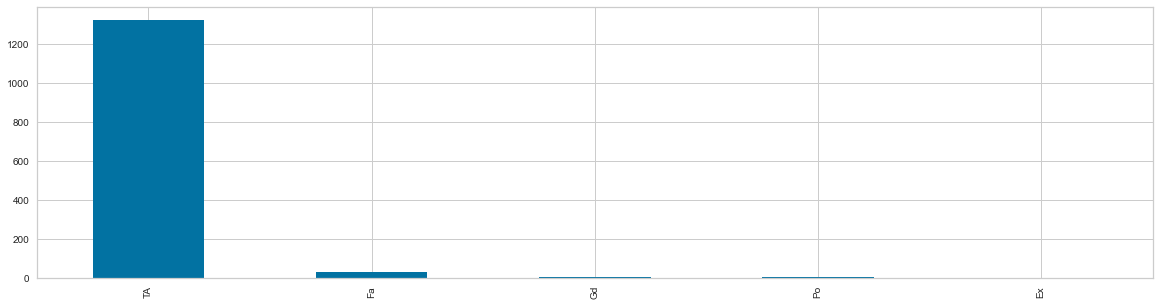

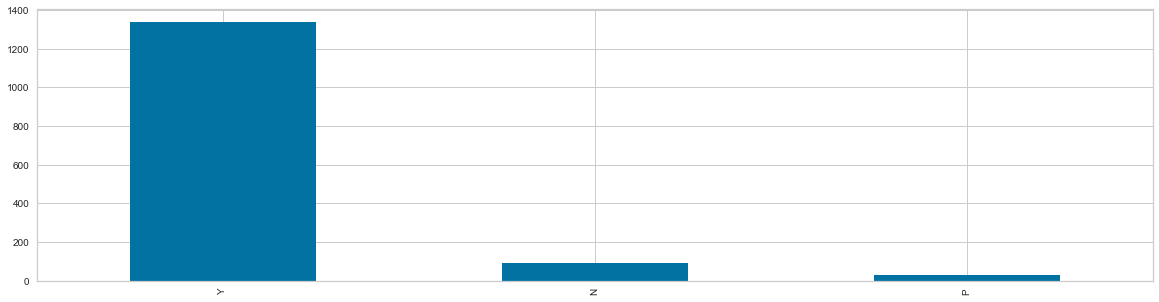

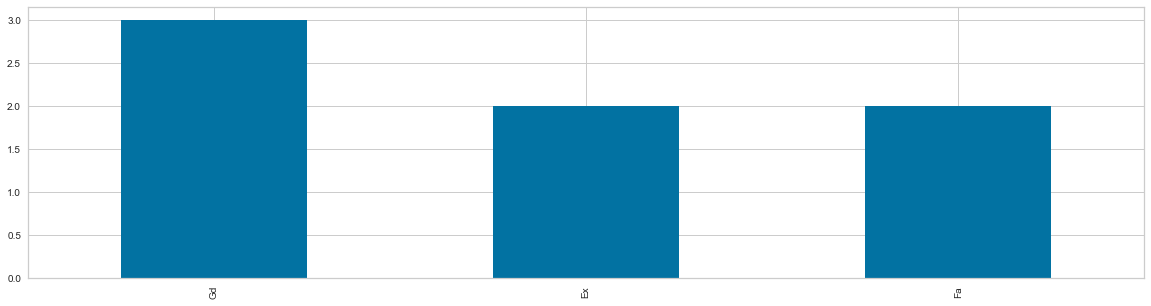

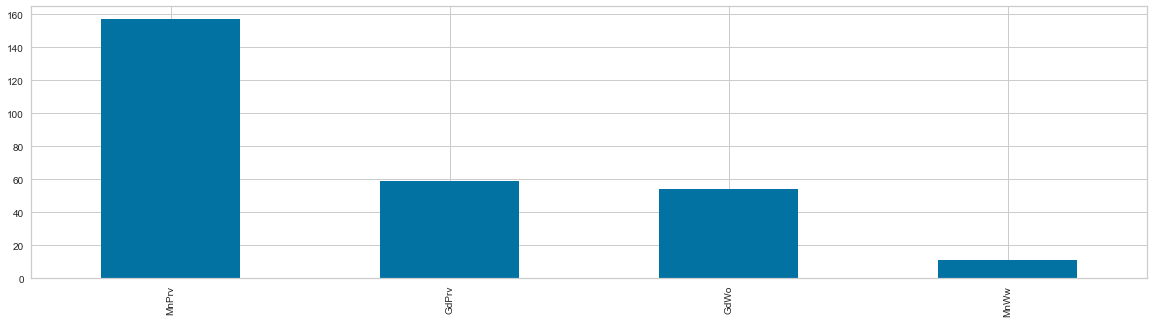

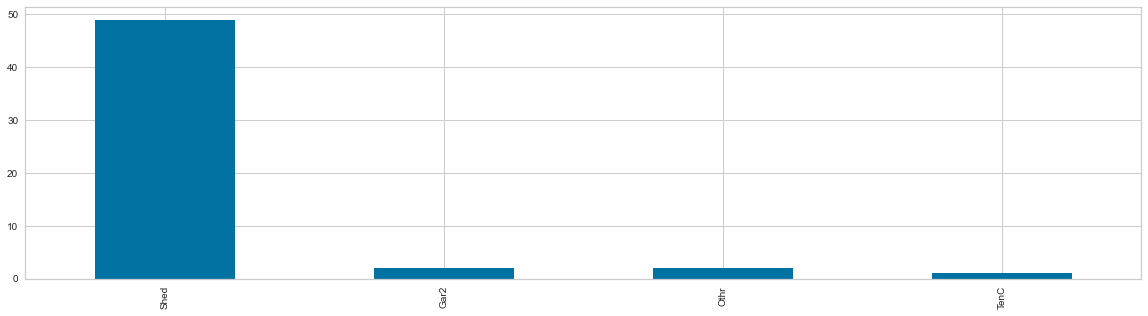

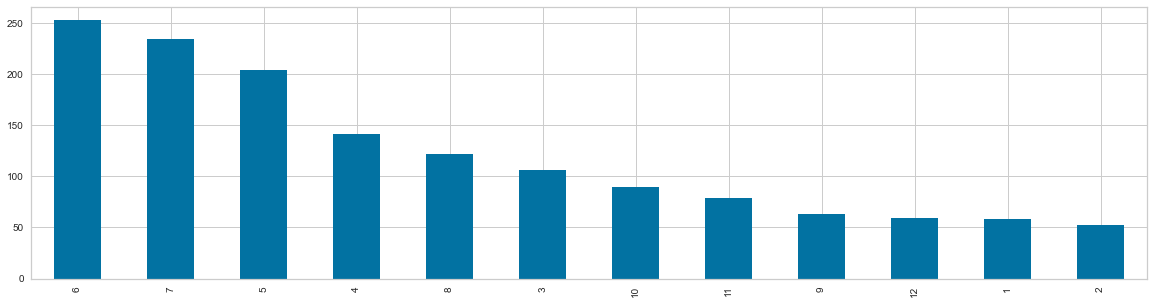

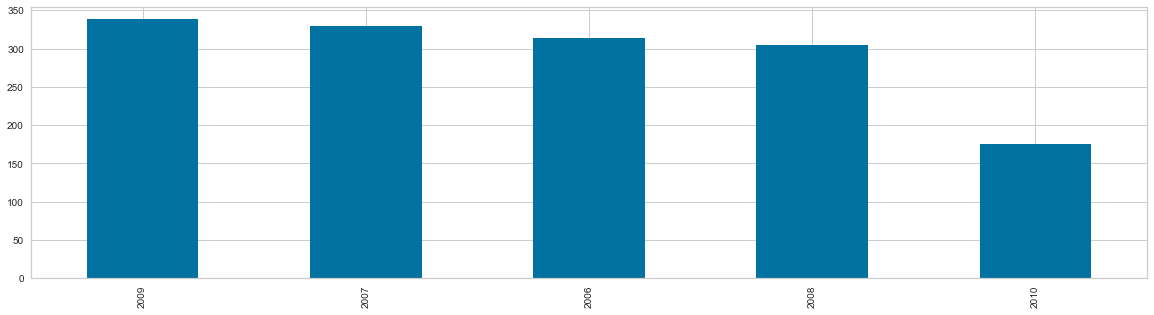

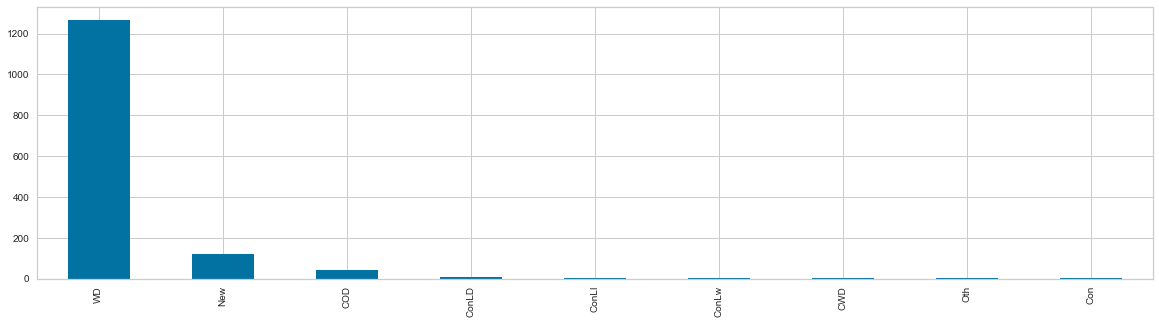

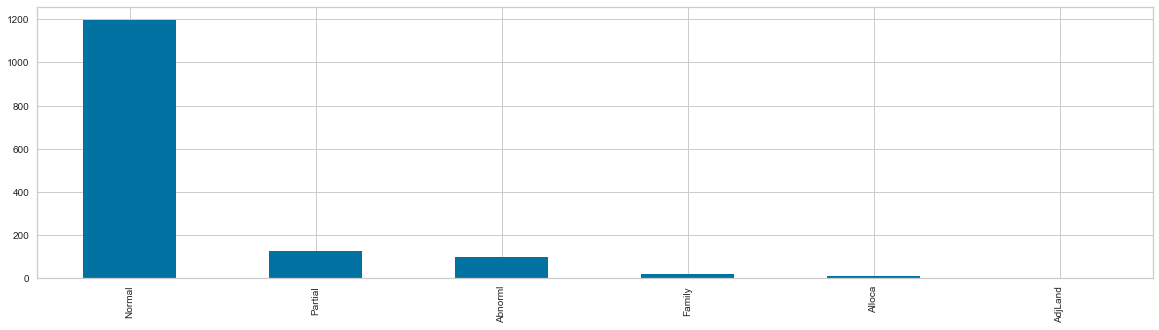

In [6]:
for var in quali_vars:
  plt.figure(figsize=(20,5))
  train_data[var].value_counts().plot(kind='bar')
  plt.show()

### Analizando la variable de interes

In [7]:
#skewness and kurtosis
print('Skewness: %f' % train_data['SalePrice'].skew())
print('Kurtosis: %f' % train_data['SalePrice'].kurt())
print('\n---Describe---')
train_data['SalePrice'].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 0.95])

Skewness: 1.882876
Kurtosis: 6.536282

---Describe---


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
65%      187500.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
stat,p = stats.shapiro(train_data[["SalePrice"]].dropna())
print('Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(train_data[["SalePrice"]].dropna())
print('Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Kolmogorov-Smirnov:
p=0.000000

Lilliefors:
ks=1.000000
p=0.001000


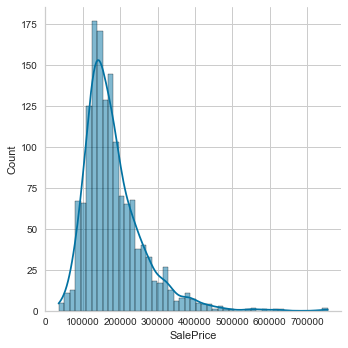

In [9]:
sns.displot(train_data['SalePrice'], kde=True)

### Correlacion

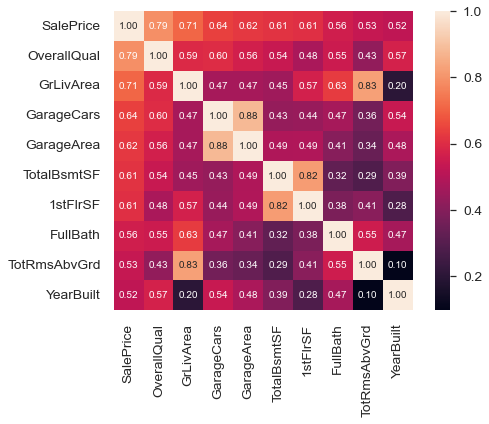

In [10]:
k = 10 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Obteniendo la relacion entre las variables mas significativas

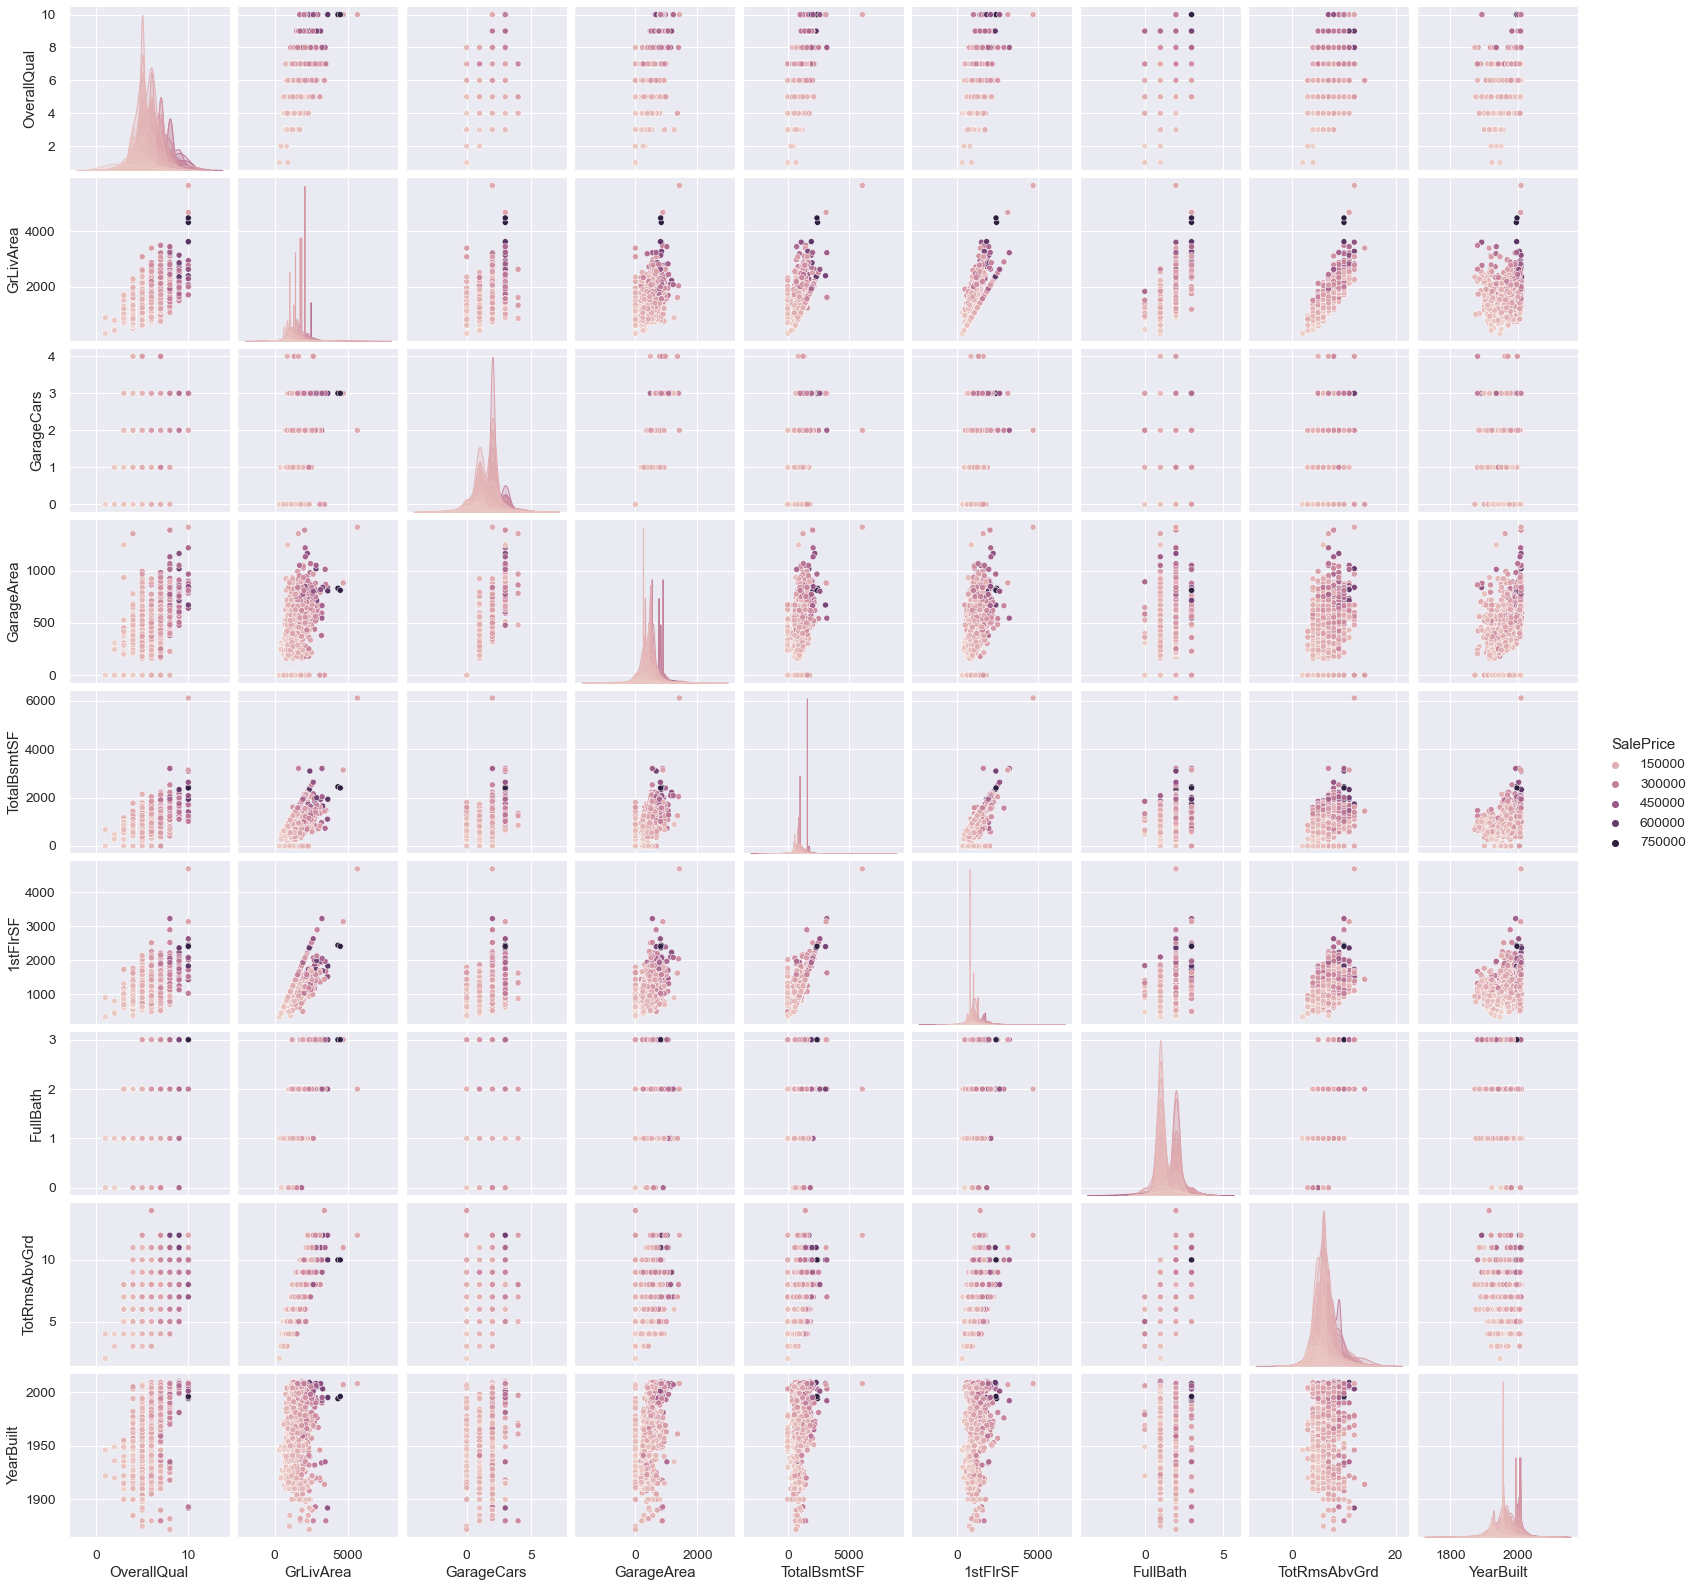

In [11]:
sns.pairplot(train_data[cols],hue="SalePrice")
plt.show()
# quant_vars

# Analizando data

In [38]:
def categorize(row): 
    if row['SalePrice'] > 0 and row['SalePrice'] <= 179280:
        return 'Low'
    elif row['SalePrice'] > 179280 and row['SalePrice'] < 326100:
        return 'Medium'
    else:
        return 'Expensive'
   
train_data['SalesCategories'] = train_data.apply(lambda row: categorize(row), axis=1)


train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalesCategories
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Low
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Medium
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Medium
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,Met

# Preprocesamiento

In [39]:
copied_train_data = train_data.copy()
copied_train_data = copied_train_data.fillna(0)

target = copied_train_data.pop('SalesCategories')
data = copied_train_data

In [42]:
categoricas = copied_train_data[quali_vars]
numericas = copied_train_data[quant_vars]

In [43]:
#Se transforman las colunas usando los preprocesadores
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


preprocesador = ColumnTransformer([
    ('one_hot_encoder', categorical_preprocessor, quali_vars),
    ('numerico', numeric_preprocessor, quant_vars)
],remainder="passthrough")

70% de entrenamiento y 30% prueba

In [44]:
for item in data:
  if (data[item].dtype == 'object'):
    data = data.astype({item: str})
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.3,train_size=0.7, random_state=42)

## Creando el modelo

In [29]:
modelo = make_pipeline(preprocesador, SVC(kernel="linear"))

# Esto nos permite ver dentro del modelo
set_config(display='diagram')
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'Ye...
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal', 'SalePrice'])])),
                ('svc', SVC(kernel='linear'))])

In [30]:
modelo.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'Ye...
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal', 'SalePrice'])])),
                ('svc', SVC(kernel='linear'))])

#### Resultados esperados

In [31]:
modelo.score(X_test, y_test)

0.9155251141552512

In [32]:
X_pred = modelo.predict(X_test)
# print(target_pred)
print ("Accuracy:",metrics.accuracy_score(y_test, X_pred))
print ("Precision:", metrics.precision_score(y_test, X_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test, X_pred,average='weighted'))

Accuracy: 0.9155251141552512
Precision: 0.915425168819231
Recall:  0.9155251141552512


In [35]:
confusion_matrix(X_pred, y_test)

array([[ 19,   0,   4],
       [  0, 255,  14],
       [  5,  14, 127]], dtype=int64)

# Tunning

### Buscando automaticamente los mejores valores para el modelo polinomial

In [27]:
modelo = make_pipeline(preprocesador, SVC(kernel="poly"))
modelo.fit(X_train,y_train)
param_grid = {
    'svc__C': (0.01, 0.1, 1, 4,16,32),
    'svc__degree':(2, 3, 4)
}
model_grid_search = GridSearchCV(modelo, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(X_train, y_train)
accuracy = model_grid_search.score(X_test, y_test)

print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.7168949771689498


{'svc__C': 32, 'svc__degree': 4}

### Buscando automaticamente los mejores valores para el modelo polinomial

In [26]:
modelo = make_pipeline(preprocesador, SVC(kernel="rbf"))
modelo.fit(X_train,y_train)
param_grid = {
    'svc__C': (0.01, 0.1, 1, 4,16,32),
    'svc__gamma':(2e-5, 2e-3,0.01,0.1,4,16,32)
    }
    

model_grid_search = GridSearchCV(modelo, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(X_train, y_train)
accuracy = model_grid_search.score(X_test, y_test)
print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.8356164383561644


{'svc__C': 32, 'svc__gamma': 2e-05}

## SVR 

In [86]:
# Log transform the target for official scoring
train = train_data[quant_vars].dropna().copy()
y = train.pop("SalePrice") #La variable respuesta
X = train #El resto de los datos

In [87]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=42)

In [88]:
modelosvr = SVR(kernel='linear')

In [89]:
modelosvr.fit(X_train,y_train)

SVR(kernel='linear')

In [94]:
y_pred = modelosvr.predict(X_test)
score = modelosvr.score(X_train, y_train)
score
# print(target_pred)
# print ("Accuracy:",metrics.accuracy_score(y_test, X_pred))
# print ("Precision:", metrics.precision_score(y_test, X_pred,average='weighted') )
# print ("Recall: ", metrics.recall_score(y_test, X_pred,average='weighted'))

0.6289039248564581